In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [2]:
dataset = pd.read_csv('airbnb.csv')
dataset


,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Home in Albany · ★4.74 · 1 bedroom · 1 bed · 1...,Efrat,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,239,08/12/2023,1.90,1,201,47
1,Rental unit in Albany · ★3.56 · 2 bedrooms · 2...,Kenneth,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,17/08/2022,0.08,1,365,0
2,Rental unit in Albany · ★4.74 · 1 bedroom · 1 ...,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,291,19/11/2023,2.54,10,361,8
3,Rental unit in Albany · ★4.51 · Studio · 1 bed...,Gregg,SECOND WARD,42.646150,-73.759660,Entire home/apt,68.0,2,332,12/11/2023,3.15,3,138,28
4,Rental unit in Albany · ★4.73 · 1 bedroom · 1 ...,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,140.0,1,305,10/12/2023,2.92,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Rental unit in Albany · ★New · 1 bedroom · 1 b...,G.G.,SEVENTH WARD,42.644782,-73.776396,Entire home/apt,73.0,15,0,NaN,NaN,1,92,0
406,Home in Albany · ★New · 2 bedrooms · 2 beds · ...,Dashima,FIRST WARD,42.640813,-73.774628,Entire home/apt,70.0,30,1,02/01/2024,1.00,1,93,1
407,Rental unit in Albany · ★New · 1 bedroom · 1 b...,Bryce,SIXTH WARD,42.650987,-73.763078,Entire home/apt,118.0,2,0,NaN,NaN,1,270,0
408,Home in Albany · ★New · 2 bedrooms · 1.5 baths,Emily,THIRTEENTH WARD,42.671404,-73.794312,Private room,85.0,5,0,NaN,NaN,2,148,0


In [3]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())


Rows :  410

Columns : 14

Columns: ['name', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
 
Unique:
 name                              312
host_name                         175
neighbourhood                      15
latitude                          388
longitude                         393
room_type                           3
price                             142
minimum_nights                     18
number_of_reviews                 140
last_review                       158
reviews_per_month                 247
calculated_host_listings_count     12
availability_365                  153
number_of_reviews_ltm              74
dtype: int64


In [4]:
Long=dataset.longitude.mean()
Lat=dataset.latitude.mean()
locations = list(zip(dataset.latitude, dataset.longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=14)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [5]:
dataset.fillna({'reviews_per_month':0},inplace=True)


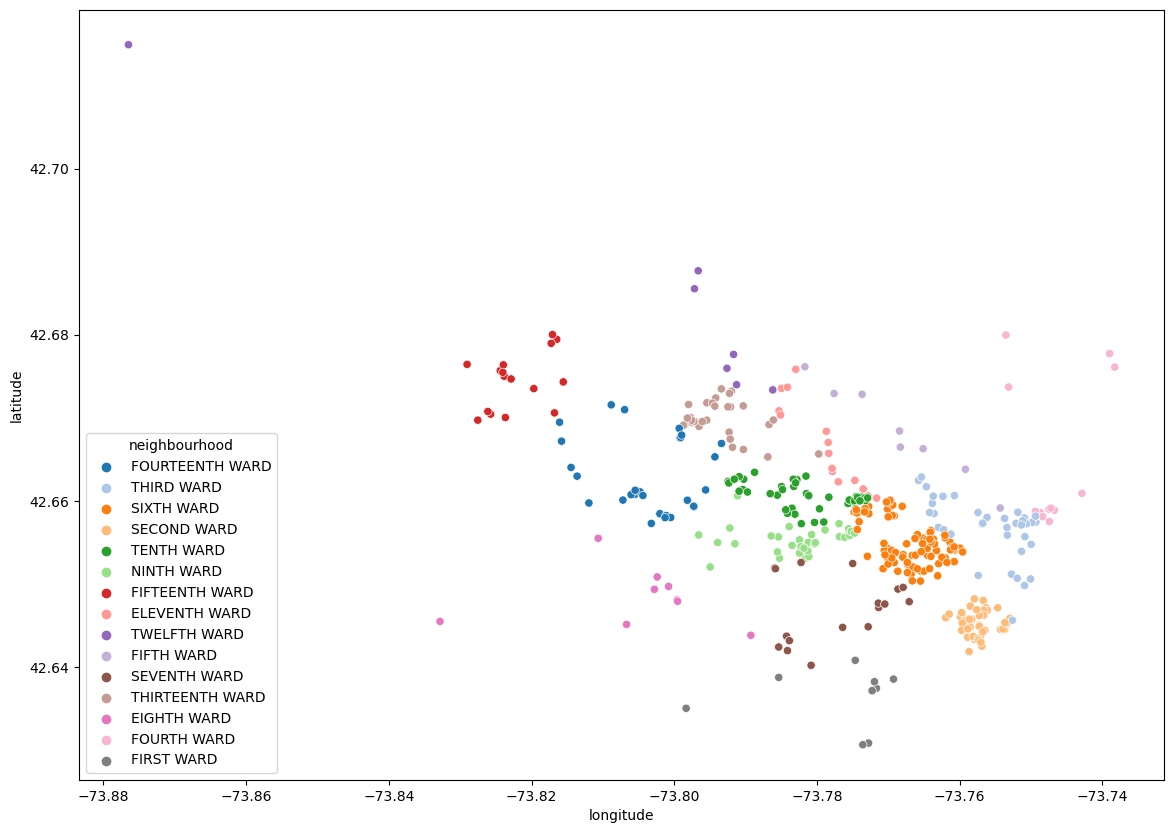

In [6]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood,palette='tab20',data=dataset)
plt.show()

In [7]:
print('Unique value for room_type are :',dataset.room_type.unique())
print('Unique value for neighbourhood_group are :',dataset.neighbourhood.unique())

# Understanding and analyzing unique values is crucial as it provides valuable insights into the data and user preferences for specific choices. We will specifically examine the Room Type and Neighbourhood group.
# In our dataset, there are three room types and five distinct neighbourhood groups. In the following section, we'll delve deeper into these categories to gain a better understanding of user distribution.

Unique value for room_type are : ['Private room' 'Entire home/apt' 'Shared room']
Unique value for neighbourhood_group are : ['FOURTEENTH WARD' 'THIRD WARD' 'SIXTH WARD' 'SECOND WARD' 'TENTH WARD'
 'NINTH WARD' 'FIFTEENTH WARD' 'ELEVENTH WARD' 'TWELFTH WARD' 'FIFTH WARD'
 'SEVENTH WARD' 'THIRTEENTH WARD' 'EIGHTH WARD' 'FOURTH WARD' 'FIRST WARD']


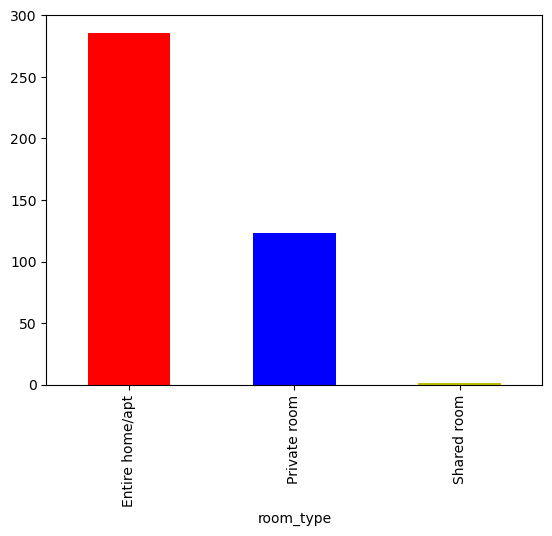

In [8]:
dataset['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()


# Initially, we'll examine the distribution of room types by grouping the data. 
# It's evident from the data that the number of Apartments and Private rooms exceeds that of shared rooms.
# Generally, shared rooms tend to be less expensive and can be particularly beneficial for frequent travelers moving between cities.
# Despite the limited shared room data, we will endeavor to uncover as much detail as possible.



In [9]:
apt = dataset[dataset['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_name','neighbourhood']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

# Below, I'm presenting the rental listings for Entire Home/Apartment, and it seems unusual that Diana has such a high number of listings by herself.
# We'll also specifically list the details for users to determine if they are genuine hotels or if there are any discrepancies in the data.
# We'll utilize the latitude and longitude of the data to investigate further.



,host_name,neighbourhood,apartment
47,Diana,SECOND WARD,7
50,Diana,THIRTEENTH WARD,6
138,Peter,FIFTEENTH WARD,6
109,Linda,FOURTH WARD,6
63,Erion,SIXTH WARD,6
110,Linda,SECOND WARD,5
59,Elizabeth,SIXTH WARD,5
55,Earl,SECOND WARD,5
93,Jerry,SIXTH WARD,5
48,Diana,TENTH WARD,4


In [10]:
sonder_data = dataset[dataset['host_name']=='Diana']
sonder_data_by = sonder_data[['host_name','neighbourhood','latitude','longitude']]
sonder_data_by.head(10)

,host_name,neighbourhood,latitude,longitude
65,Diana,EIGHTH WARD,42.64936,-73.80278
69,Diana,SECOND WARD,42.64335,-73.75790
71,Diana,SECOND WARD,42.64506,-73.75727
73,Diana,EIGHTH WARD,42.65085,-73.80239
93,Diana,EIGHTH WARD,42.64383,-73.78926
144,Diana,SECOND WARD,42.64186,-73.75868
145,Diana,NINTH WARD,42.65674,-73.79221
147,Diana,THIRTEENTH WARD,42.67181,-73.79543
148,Diana,TENTH WARD,42.66236,-73.79245
149,Diana,THIRTEENTH WARD,42.67131,-73.79210


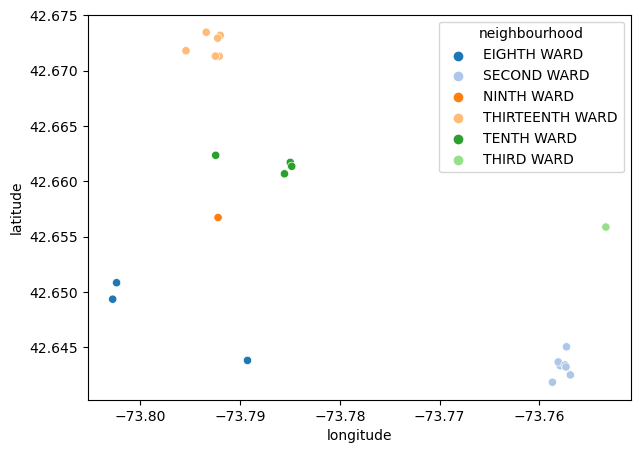

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=sonder_data.longitude,y=sonder_data.latitude,hue=sonder_data.neighbourhood,palette='tab20',data=sonder_data)
plt.show()

# Seeing the below latitude and longitude 
# it is clear that most of them are in the same building.
# It is possible that Diana is a hotel owner and has multiple listings in the same building.

In [12]:
private = dataset[dataset['room_type']=='Private room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

# We will perform the same analysis for both Private room and Shared room listings.
# Additionally, we'll examine the top hoteliers to determine if they are concentrated in the same location or if they are spread out across different areas.

,host_name,neighbourhood,private
7,Argus,SIXTH WARD,6
9,Bela,NINTH WARD,6
56,Terra,NINTH WARD,6
46,Michael And Flerida,FOURTEENTH WARD,5
59,Thomas,THIRTEENTH WARD,5
16,Clyde,SIXTH WARD,4
58,Thomas,FOURTEENTH WARD,4
57,Terra,SIXTH WARD,4
8,Argus,TENTH WARD,4
13,Chad,TENTH WARD,4


In [13]:
private_data = dataset[dataset['host_name']=='Argus']
private_data_by = private_data[['host_name','neighbourhood','latitude','longitude']]
private_data_by

,host_name,neighbourhood,latitude,longitude
331,Argus,SIXTH WARD,42.658672,-73.774787
332,Argus,ELEVENTH WARD,42.660600,-73.772840
334,Argus,TENTH WARD,42.659083,-73.774557
335,Argus,TENTH WARD,42.660430,-73.774320
336,Argus,SIXTH WARD,42.658469,-73.772724
337,Argus,SIXTH WARD,42.659080,-73.773259
338,Argus,TENTH WARD,42.660034,-73.773201
339,Argus,SIXTH WARD,42.658565,-73.774398
340,Argus,SIXTH WARD,42.658927,-73.774480
341,Argus,TENTH WARD,42.660367,-73.773270


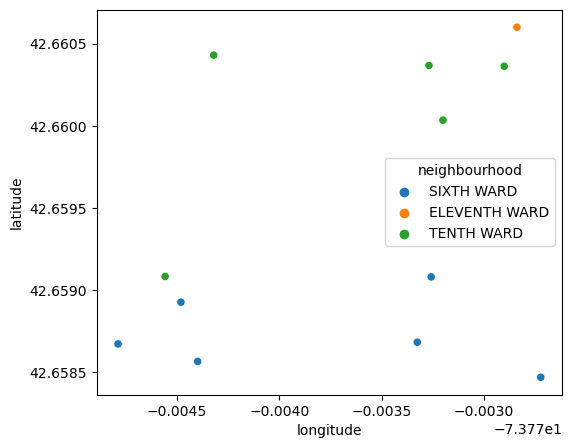

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=private_data_by.neighbourhood)
plt.show()



Long=private_data_by.longitude.mean()
Lat=private_data_by.latitude.mean()
locations = list(zip(private_data_by.latitude, private_data_by.longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=18)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [15]:
private = dataset[dataset['room_type']=='Shared room']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)


,host_name,neighbourhood,shared
0,Nicola,FOURTH WARD,1


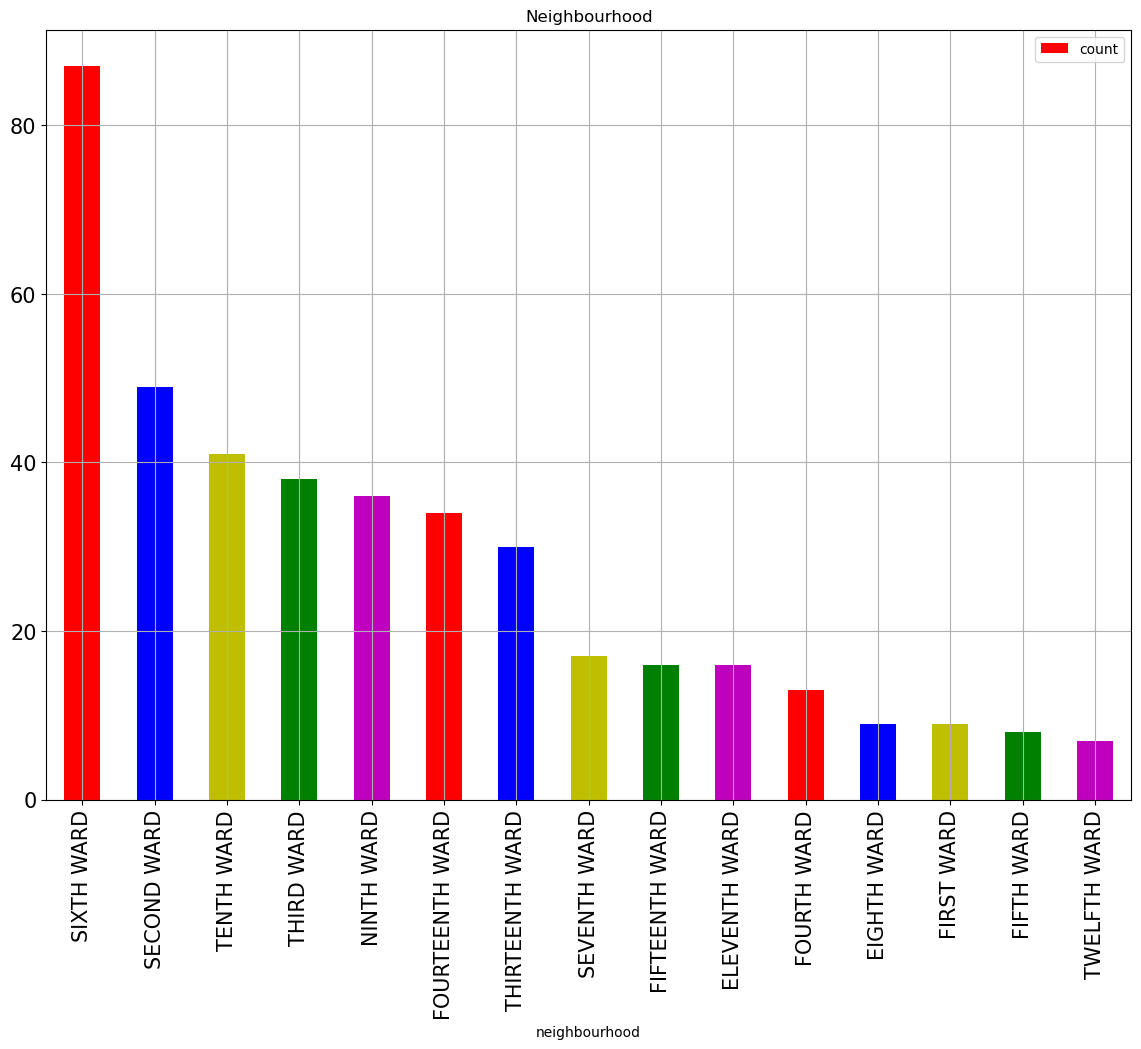

In [16]:
dataset['neighbourhood'].value_counts().plot(kind='bar',color=['r','b','y','g','m'],figsize=(14,10),title='Neighbourhood',fontsize=15,rot=90,grid=True,legend=True)
plt.show()

# From the below it looks like SIXTH WARD and SECOND WARD has more numbers of listing than all places.

In [17]:
private = dataset[dataset['neighbourhood']=='SIXTH WARD']
list_private = private.groupby(['host_name','neighbourhood']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)

,host_name,neighbourhood,count
42,Terra,SIXTH WARD,8
5,Argus,SIXTH WARD,6
13,Erion,SIXTH WARD,6
12,Elizabeth,SIXTH WARD,6
22,Jerry,SIXTH WARD,5
8,Clyde,SIXTH WARD,4
24,Joshua,SIXTH WARD,4
28,Lloyd,SIXTH WARD,3
0,Abba,SIXTH WARD,3
38,Rodney,SIXTH WARD,2


In [18]:
dataset.dropna(inplace=True)
dataset.isna().sum()




name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [19]:
dataset['price'].describe()

# We'll start with a summary of the price data. According to the summary statistics, prices range from $27 to $130.
# However, there are instances where the price reaches a maximum of $1209.
# We cannot simply discard this as an outlier because prices can vary for numerous reasons, including location, room type, neighborhood, season, and more.
# To gain further insight, 
# we'll plot a boxplot to visualize how the data is distributed for higher price ranges, regardless of region.
# This will help us understand the spread of data and identify any potential patterns or trends.

count     359.000000
mean      120.019499
std       103.691917
min        27.000000
25%        75.000000
50%        99.000000
75%       128.000000
max      1209.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

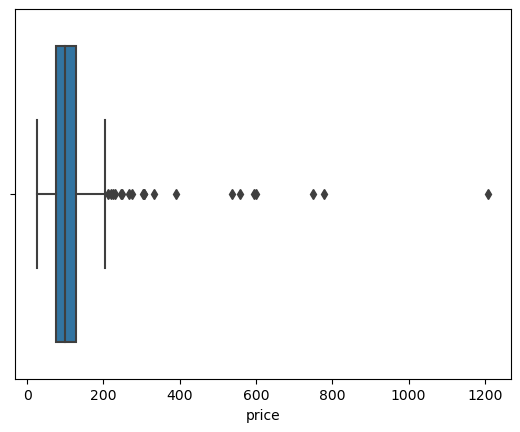

In [20]:
figsize=(12,8)
sns.boxplot(x='price',data=dataset)

In [21]:
# For travelers, one of the key considerations is the price, as it determines the budget for their trip.
# In the analysis below, we'll determine the average price per night for different room types and neighborhood groups.

# Typically, staying in an entire home is more expensive than staying in a shared room or private room, regardless of location.
# This is because renting an entire home offers amenities and privacy, making it ideal for families seeking a comfortable stay. 
# On the other hand, private rooms are preferred by travelers who prefer flexibility and move around frequently without staying in one place for an extended period.

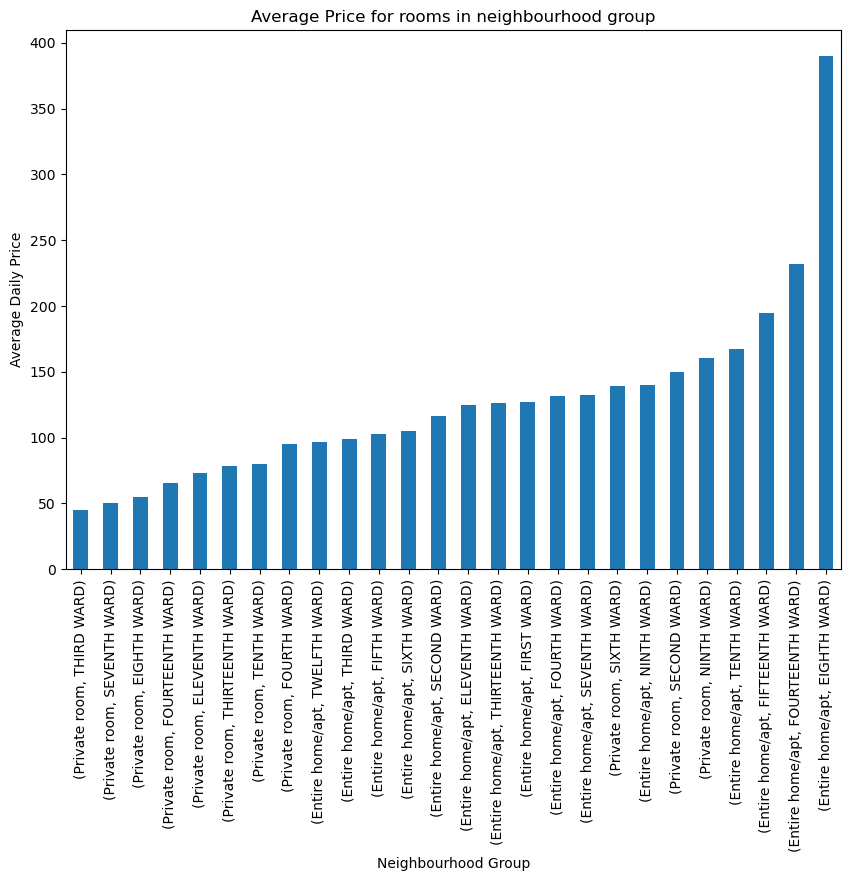

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood              
Entire home/apt SECOND WARD      116.320000
                FIFTEENTH WARD   194.666667
                TENTH WARD       167.636364
                NINTH WARD       139.600000
                SEVENTH WARD     132.000000
                FOURTH WARD      131.500000
                FIRST WARD       127.000000
                THIRTEENTH WARD  126.000000
                ELEVENTH WARD    124.750000
                FOURTEENTH WARD  231.666667
                SIXTH WARD       105.206897
                EIGHTH WARD      390.000000
                THIRD WARD        99.000000
                TWELFTH WARD      97.000000
                FIFTH WARD       103.000000
Private room    FOURTH WARD       95.000000
                TENTH WARD        79.600000
                THIRTEENTH WARD   78.500000
                ELEVENTH WARD     73.333333
                SIXTH WARD       139.285714
                FOURTEENTH WARD   65.555556
                SECOND WARD      149.666667
                NINTH WARD       160.200000
                EIGHTH WARD       55.000000
                SEVENTH WARD      50.000000
                THIRD WARD        45.000000

In [22]:
dataset.head()
plt.figure(figsize=(10,7))
df = dataset[dataset['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')


In [23]:
# Analyzing the plot, several conclusions can be drawn:

# a. The cheapest stay per night in TENTH WARD is a shared room, whereas renting an entire home in the same area is the most expensive option.
# b. SECOND WARD emerges as the most expensive neighborhood group across all room types
# c. THIRD WARD offers the cheapest stays compared to other neighborhood groups, irrespective of room type.
# d. Interestingly, while a private room in SEVENTH WARD is the cheapest option, renting an apartment in the same area is not the most economical choice. 
#    This could be attributed to SEVENTH WARD's location, which serves as a perfect getaway from the city's hustle and bustle,
#    making it an attractive option for quality family time and gatherings, thereby increasing the demand for entire homes.

# We will provide a list of the average price for each type of room per neighborhood, which will assist tourists in planning their accommodation based on their budget.
# This breakdown will offer valuable insights into the expected costs across different room types and neighborhoods, enabling tourists to make informed decisions about their accommodation choices.

In [24]:
# We haven't yet analyzed each neighborhood individually in terms of price, which is crucial for understanding the price discrepancies across different localities.

# To address this, we'll now plot the most expensive neighborhoods, focusing on the top 20 and bottom 20 neighborhoods based on average price per night.
# This analysis will enable travelers to make informed decisions about choosing a neighborhood that aligns with their budget.

# According to the plot, EIGHTH WARD emerges as the most expensive neighborhood, while ELEVENTH WARD is the least expensive locality to stay in. 
# This information will assist travelers in selecting the appropriate neighborhood based on their budget constraints.

Top 20 most expensive locality in Airbnb listing are :


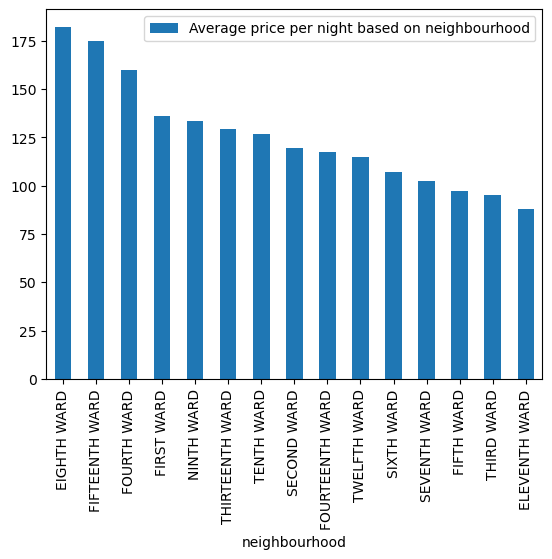

,Average price per night based on neighbourhood
neighbourhood,
EIGHTH WARD,182.142857
FIFTEENTH WARD,174.800000
FOURTH WARD,159.818182
FIRST WARD,136.000000
NINTH WARD,133.515152
THIRTEENTH WARD,129.481481
TENTH WARD,126.685714
SECOND WARD,119.363636
FOURTEENTH WARD,117.393939


In [25]:
print('Top 20 most expensive locality in Airbnb listing are :')
df4 = dataset.groupby(['neighbourhood'])[["price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(20)
df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

In [26]:

# We'll now examine the number of listings posted in each neighborhood to understand the distribution.
# Observing the data, SITH WARD has the highest number of listings, while EIGHTH WARD has one of the lowest numbers of listings.
# Considering EIGHTH WARD's high pricing trend, the scarcity of listings might contribute to the increased prices. 
# Less availability in a neighborhood could potentially drive prices higher due to increased demand relative to supply.

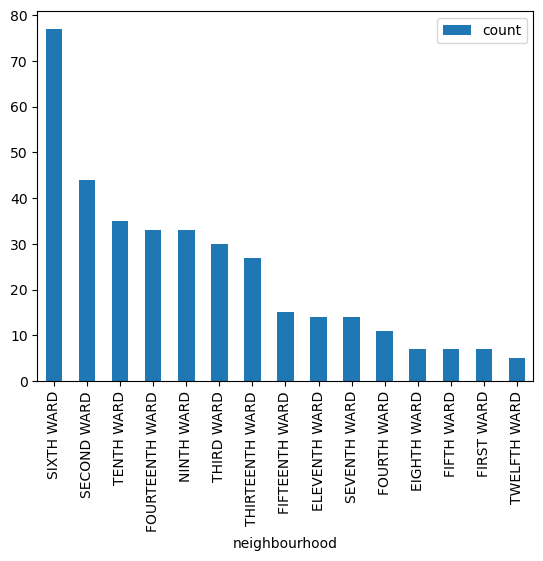

,count
neighbourhood,
SIXTH WARD,77
SECOND WARD,44
TENTH WARD,35
FOURTEENTH WARD,33
NINTH WARD,33
THIRD WARD,30
THIRTEENTH WARD,27
FIFTEENTH WARD,15
ELEVENTH WARD,14


In [27]:
df5 = dataset.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count'])['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})
df5.head(20).plot(kind='bar')
plt.show()
pd.DataFrame(df5.head(20))

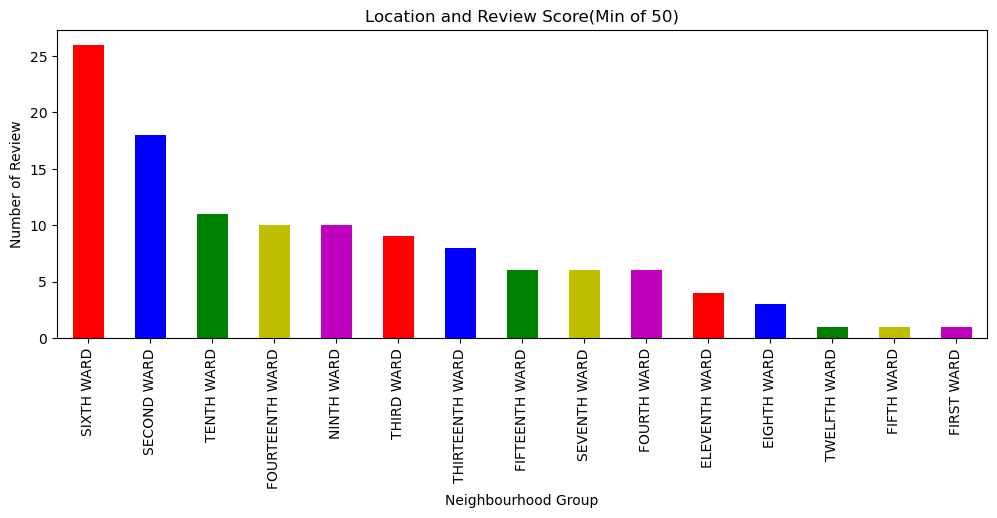

 Count of Review v/s neighbourhood group


,count
neighbourhood,
SIXTH WARD,26
SECOND WARD,18
TENTH WARD,11
FOURTEENTH WARD,10
NINTH WARD,10
THIRD WARD,9
THIRTEENTH WARD,8
FIFTEENTH WARD,6
SEVENTH WARD,6


In [28]:
fig = plt.figure(figsize=(12,4))
review_50 = dataset[dataset['number_of_reviews']>=50]
df2 = review_50['neighbourhood'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

In [29]:
# We will first filter the dataset to include only listings with a minimum of 50 reviews. 
# Then, we'll identify the top 5 hosts based on their review scores. After that, we'll plot the locations of these reviews on a map using latitude and longitude coordinates. 
# This visual representation will enhance tourists' confidence prior to booking by highlighting the top-rated hosts and their respective locations.

Long=dataset.longitude.mean()
Lat=dataset.latitude.mean()
map1=folium.Map([Lat,Long],zoom_start=13)
location = ['latitude','longitude']
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(map1)
map1

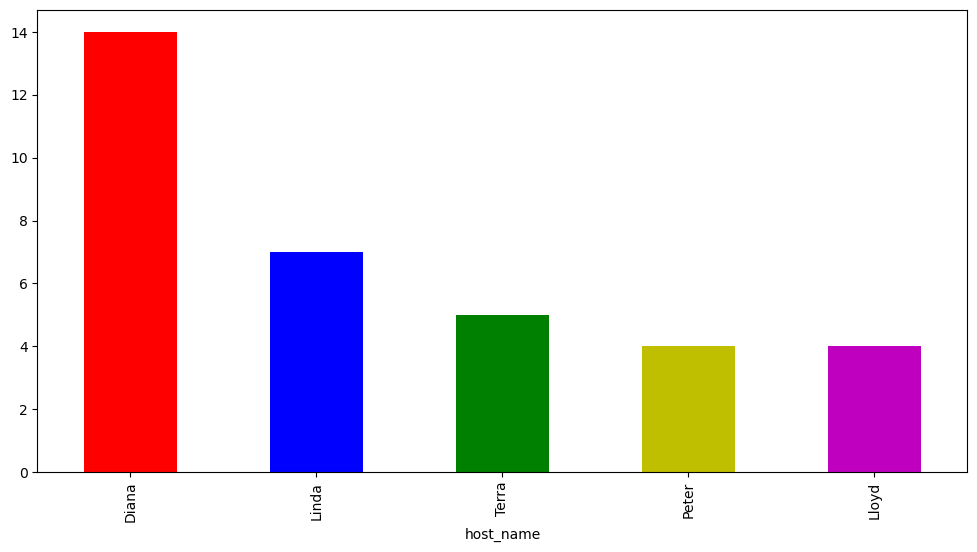

In [30]:
# Below plot shows the Top 5 host and it looks like Diana has received more reviews for topping the chart .

plt.figure(figsize=(12,6))
review_50.head()
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])


<Axes: xlabel='availability_365', ylabel='price'>

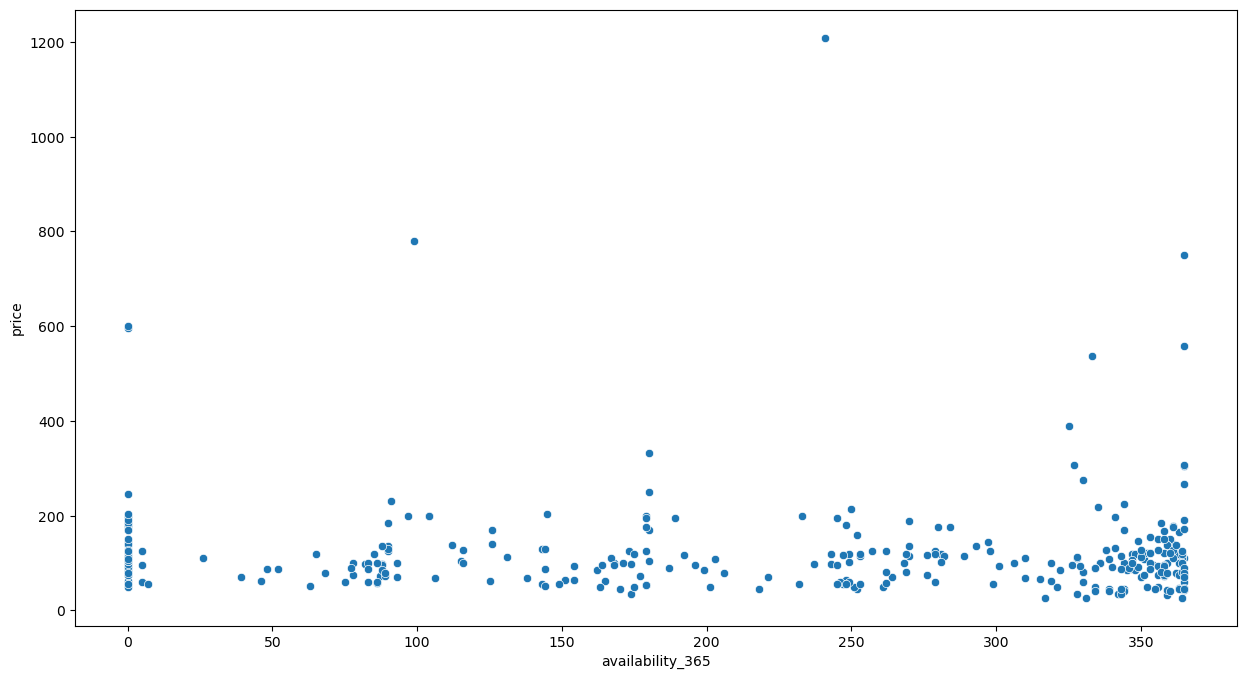

In [31]:

# Plot Price based on the Availability 365
# We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer.
# But looks like with availability with 360 the price increases to nearly 1000.

plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['price'],x=dataset['availability_365'])


In [33]:
review_50 = review_50.drop(['last_review','calculated_host_listings_count','reviews_per_month','name','host_name'],axis=1)
review_50
df6 = review_50.groupby(['room_type','neighbourhood']).mean()
pd.DataFrame(df6).sort_values('room_type')

latitude  longitude       price  \
room_type       neighbourhood                                       
Entire home/apt EIGHTH WARD      42.643830 -73.789260  245.000000   
                THIRTEENTH WARD  42.668914 -73.793247  118.500000   
                TENTH WARD       42.661886 -73.784801  227.714286   
                SIXTH WARD       42.654441 -73.765650  106.880000   
                SEVENTH WARD     42.649607 -73.776630  126.200000   
                SECOND WARD      42.645331 -73.756396  107.375000   
                THIRD WARD       42.656114 -73.755540   93.444444   
                FOURTH WARD      42.662222 -73.745470  136.166667   
                FOURTEENTH WARD  42.659910 -73.802066  141.400000   
                FIRST WARD       42.638760 -73.785350  139.000000   
                FIFTEENTH WARD   42.673452 -73.824181  193.833333   
                ELEVENTH WARD    42.661040 -73.773773  134.000000   
                NINTH WARD       42.655165 -73.783603  243.333333   
Private room    TENTH WARD       42.659087 -73.784005   55.000000   
                SIXTH WARD       42.658210 -73.769170   75.000000   
                SEVENTH WARD     42.652590 -73.782230   50.000000   
                SECOND WARD      42.645970 -73.758680   75.500000   
                FIFTH WARD       42.676140 -73.781690   44.000000   
                FOURTEENTH WARD  42.665238 -73.808100   64.000000   
                ELEVENTH WARD    42.675830 -73.782970   47.000000   
                EIGHTH WARD      42.650105 -73.802585   55.000000   
                THIRTEENTH WARD  42.669155 -73.798590  101.500000   
                NINTH WARD       42.654018 -73.781863   57.500000   
                TWELFTH WARD     42.687690 -73.796640   60.000000   

                                 minimum_nights  number_of_reviews  \
room_type       neighbourhood                                        
Entire home/apt EIGHTH WARD            2.000000          66.000000   
                THIRTEENTH WARD        1.833333          63.500000   
                TENTH WARD             1.571429          92.714286   
                SIXTH WARD             1.360000         191.160000   
                SEVENTH WARD           1.200000         206.200000   
                SECOND WARD            1.250000         225.750000   
                THIRD WARD             1.222222         118.000000   
                FOURTH WARD            1.000000         107.666667   
                FOURTEENTH WARD        1.600000         249.600000   
                FIRST WARD             1.000000          92.000000   
                FIFTEENTH WARD         1.166667          96.833333   
                ELEVENTH WARD          1.333333         101.333333   
                NINTH WARD             1.833333         112.166667   
Private room    TENTH WARD             5.750000          76.750000   
                SIXTH WARD             1.000000          59.000000   
                SEVENTH WARD           1.000000         149.000000   
                SECOND WARD            1.500000         212.000000   
                FIFTH WARD             3.000000         130.000000   
                FOURTEENTH WARD        1.200000         129.000000   
                ELEVENTH WARD          1.000000         229.000000   
                EIGHTH WARD            1.000000         237.500000   
                THIRTEENTH WARD        1.000000          94.500000   
                NINTH WARD             1.500000         119.500000   
                TWELFTH WARD           2.000000         223.000000   

                                 availability_365  number_of_reviews_ltm  
room_type       neighbourhood                                             
Entire home/apt EIGHTH WARD              0.000000              20.000000  
                THIRTEENTH WARD        194.166667              21.666667  
                TENTH WARD             255.857143              24.142857  
                SIXTH WARD             184.